In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import exp
import regression as r
import numpy as np

In [2]:
df = exp.get_wp_energy_data_landsat()
df["p-pet"] = df["precip"] - df["PET"]
df["p-et"] = df["precip"] - df["wp_le"] * .408
df.head()

,PET,VPD,air_temp,doy,precip,soil_temp,sw_in,wind_speed,year,wp_RNET,...,wp_evi,wp_lswi2,wp_ndvi,wp_LST.day,wp_LST.night,LW_IN.wp,LW_IN.si,LW_IN,p-pet,p-et
0,7.33,0.808731,19.179167,195,0.0,22.320833,30.3156,4.958333,2012,20.798342,...,0.377924,0.413754,0.594708,31.567899,17.204530,29.105844,24.562860,29.105844,-7.33,-5.566712
1,6.52,0.755945,19.325000,196,0.0,21.770833,29.6316,3.791667,2012,20.573593,...,0.381184,0.420529,0.597960,29.570000,17.390000,29.760736,26.096551,29.760736,-6.52,-5.507494
2,6.92,0.858993,20.262500,197,0.0,21.908333,29.3472,4.137500,2012,20.475931,...,0.384444,0.427304,0.601212,31.097908,17.235624,30.299442,25.986418,30.299442,-6.92,-6.115032
3,6.35,0.477617,16.791667,198,0.0,22.420833,28.8180,6.033333,2012,20.571045,...,0.387704,0.434079,0.604465,30.868718,17.248525,28.978868,25.122209,28.978868,-6.35,-4.633187
4,5.13,0.556820,17.016667,199,0.0,21.529167,23.1732,4.350000,2012,16.757401,...,0.390963,0.440854,0.607717,30.657792,17.259663,30.653667,27.830367,30.653667,-5.13,-4.464786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 26 columns):
PET             1028 non-null float64
VPD             1028 non-null float64
air_temp        1028 non-null float64
doy             1028 non-null int64
precip          1028 non-null float64
soil_temp       1028 non-null float64
sw_in           1028 non-null float64
wind_speed      1028 non-null float64
year            1028 non-null int64
wp_RNET         1028 non-null float64
wp_ch4_gf       1028 non-null float64
wp_co2_gf       1028 non-null float64
wp_er           1028 non-null float64
wp_gpp          1028 non-null float64
wp_h            1028 non-null float64
wp_le           1028 non-null float64
wp_evi          1028 non-null float64
wp_lswi2        1028 non-null float64
wp_ndvi         1028 non-null float64
wp_LST.day      1028 non-null float64
wp_LST.night    1028 non-null float64
LW_IN.wp        1028 non-null float64
LW_IN.si        1028 non-null float64
LW_IN           1028 no

In [4]:
train_cols = ["precip", "sw_in", "LW_IN.wp", "VPD", "air_temp", "PET", "wind_speed", "wp_LST.day",
             "wp_LST.night", "wp_evi", "wp_ndvi", "wp_lswi2", "wp_RNET", "wp_gpp", "p-pet", "p-et"]
X, Y = exp.featurize(df, train_cols, ["wp_ch4_gf"])
X_train, X_test, Y_train, Y_test = r.get_train_test_split(X, Y, test_size=0.33)
print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(688, 16) (688,) (340, 16) (340,)


R2-score:  0.862619151107
Mean Squared Error:  72389.8245339
Median Absolute Error:  102.6475586
Explained Variance Error:  0.862807715047


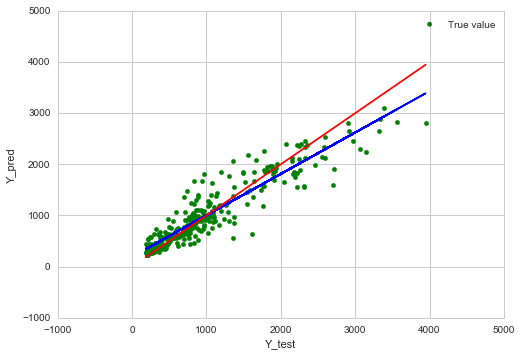

In [5]:
Y_pred = r.predict(r.random_forests(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.877049058008
Mean Squared Error:  64786.301648
Median Absolute Error:  115.672810027
Explained Variance Error:  0.877058676985


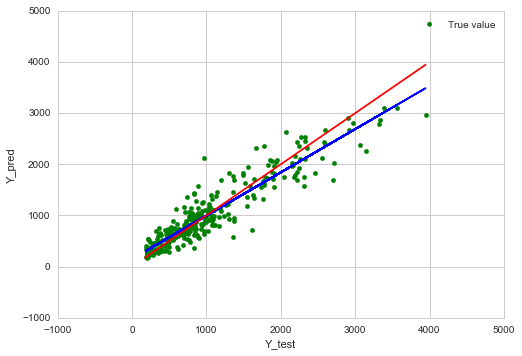

In [6]:
Y_pred = r.predict(r.xgb_trees(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.063296882229
Mean Squared Error:  493575.158999
Median Absolute Error:  322.338008599
Explained Variance Error:  0.134983352631


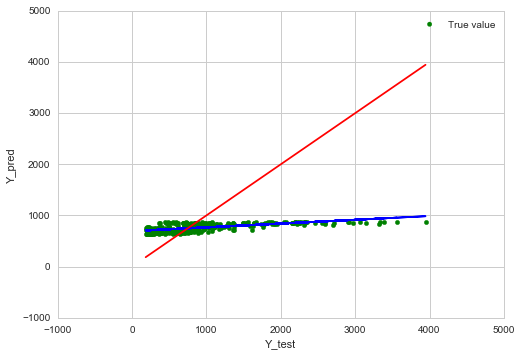

In [7]:
Y_pred = r.predict(r.svm(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

Step #1, avg. loss: 1284408.87500
Step #501, epoch #71, avg. loss: 764637.18750
Step #1001, epoch #143, avg. loss: 399947.18750
Step #1501, epoch #214, avg. loss: 291828.50000
Step #2001, epoch #285, avg. loss: 230192.73438
Step #2501, epoch #357, avg. loss: 186202.53125
Step #3001, epoch #428, avg. loss: 158585.56250
Step #3501, epoch #500, avg. loss: 135181.46875
Step #4001, epoch #571, avg. loss: 117015.42969
Step #4501, epoch #643, avg. loss: 103470.07031
R2-score:  0.744976136292
Mean Squared Error:  134379.230399
Median Absolute Error:  95.0976628038
Explained Variance Error:  0.747175163962


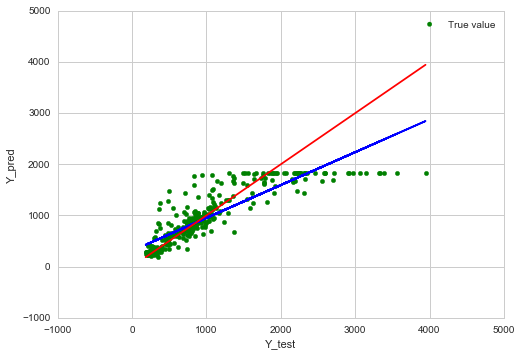

In [8]:
Y_pred = r.predict(r.dnn(nn_steps=5000), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)